Import package

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import ast

from matminer.datasets.dataframe_loader import load_flla
from matminer.utils.data_files.deml_elementdata import atom_num

Load data

In [2]:
%%time
data = load_flla()

CPU times: user 8.3 s, sys: 143 ms, total: 8.44 s
Wall time: 8.65 s


In [3]:
print ("Shape of data: ", data.shape)

Shape of data:  (3938, 7)


### 1) Compute frequency of occurrence of various elements in data and generate figure

Convert formula to composition

In [4]:
data['composition'] = data['formula'].apply(ast.literal_eval)

Count occurrence of elements

In [33]:
num = range(1, 101)
Z = dict.fromkeys(num, 0)

In [34]:
for i in data['composition']:
    for k, v in i.items():
        Z[atom_num[k]] += v

In [36]:
total_count = sum(Z.values())

Convert count to percentage

In [46]:
Z_percent = Z.copy()
for k, v in Z_percent.items():
    Z_percent[k] = v*100/total_count

Plot occurrence

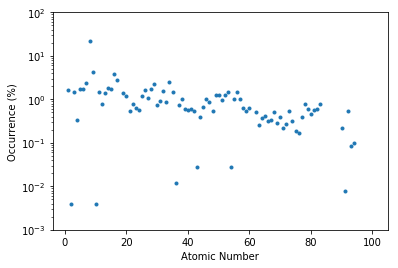

In [51]:
fig, ax = plt.subplots()

ax.scatter(Z_percent.keys(), Z_percent.values(), marker='.')
ax.set_ylim([10**-3, 10**2])
ax.set_yscale('log')

ax.set_xlabel("Atomic Number")
ax.set_ylabel("Occurrence (%)")

fig.savefig("occurrence.png")